In [1]:
from torchvision.models import vit_b_32, ConvNeXt_Large_Weights
from torchvision.models import convnext_small, ConvNeXt_Small_Weights
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append("..")
from utils import get_best_available_device
from dataset import ImageDataset
import matplotlib.pyplot as plt

# 1. Get dataset

In [2]:
# BATCH_SIZE = 32
BATCH_SIZE = 1
device = get_best_available_device()
print("Using device:", device)

dataset = ImageDataset(path="../../data/training/", device="cpu", use_patches=False)
dataloader = iter(DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True))

Using device: cpu


Loading images:   0%|          | 0/134 [00:00<?, ?it/s]

Loading images:   0%|          | 0/134 [00:00<?, ?it/s]

In [3]:
print(f"There are {len(dataloader)} images in the dataset.")

There are 804 images in the dataset.


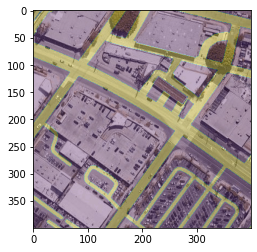

In [4]:
batch = next(dataloader)
images, masks = batch

plt.imshow(images[0].numpy().transpose(1, 2, 0))
plt.imshow(masks[0].numpy().transpose(1, 2, 0), alpha=0.3)
plt.show()

# 2. Create model and load weights

In [6]:
import json

with open('imagenet_labels.json', 'r') as f:
    labels = json.load(f)["labels"]


In [7]:
# preprocess = weights.transforms()
# preprocess
# TODO do we remove preprocessing?

In [8]:
with torch.no_grad():
    out = encoder(images)  
# len(encoder.x_int)
# list of channels in and channels out when upsampling
sizes = [(y.shape[1], x.shape[1])  for x,y in zip(encoder.x_int, encoder.x_int[1:])]
sizes.reverse()
# for int in encoder.x_int:
    # print(int.shape)
# out.shape
print("those are the sizes for the decoder inferred from the encoder", sizes)


those are the sizes for the decoder inferred from the encoder [(768, 384), (384, 192), (192, 96), (96, 3)]


In [26]:
from swin_unet import SwinUnet

model_unet = SwinUnet()

TypeError: __init__() missing 2 required positional arguments: 'encoder' and 'decoder'

In [19]:
with torch.no_grad():
    out2 = model_unet(images)

torch.Size([1, 384, 25, 25])
torch.Size([1, 192, 50, 50])
torch.Size([1, 96, 100, 100])
torch.Size([1, 3, 400, 400])
wow
torch.Size([1, 768, 13, 13]) torch.Size([1, 384, 25, 25]) torch.Size([1, 384, 26, 26])
torch.Size([1, 768, 25, 25]) torch.Size([1, 384, 25, 25])
wow
torch.Size([1, 384, 25, 25]) torch.Size([1, 192, 50, 50]) torch.Size([1, 192, 50, 50])
torch.Size([1, 384, 50, 50]) torch.Size([1, 192, 50, 50])
wow
torch.Size([1, 192, 50, 50]) torch.Size([1, 96, 100, 100]) torch.Size([1, 96, 100, 100])
torch.Size([1, 192, 100, 100]) torch.Size([1, 96, 100, 100])
wow
torch.Size([1, 96, 100, 100]) torch.Size([1, 3, 400, 400]) torch.Size([1, 3, 200, 200])
after last_later_up torch.Size([1, 3, 400, 400])
final output torch.Size([1, 1, 400, 400])


In [25]:
out2.shape

encoder.features.0.0.weight torch.Size([96, 3, 4, 4])
encoder.features.0.0.bias torch.Size([96])
encoder.features.0.2.weight torch.Size([96])
encoder.features.0.2.bias torch.Size([96])
encoder.features.1.0.norm1.weight torch.Size([96])
encoder.features.1.0.norm1.bias torch.Size([96])
encoder.features.1.0.attn.relative_position_bias_table torch.Size([169, 3])
encoder.features.1.0.attn.qkv.weight torch.Size([288, 96])
encoder.features.1.0.attn.qkv.bias torch.Size([288])
encoder.features.1.0.attn.proj.weight torch.Size([96, 96])
encoder.features.1.0.attn.proj.bias torch.Size([96])
encoder.features.1.0.norm2.weight torch.Size([96])
encoder.features.1.0.norm2.bias torch.Size([96])
encoder.features.1.0.mlp.0.weight torch.Size([384, 96])
encoder.features.1.0.mlp.0.bias torch.Size([384])
encoder.features.1.0.mlp.3.weight torch.Size([96, 384])
encoder.features.1.0.mlp.3.bias torch.Size([96])
encoder.features.1.1.norm1.weight torch.Size([96])
encoder.features.1.1.norm1.bias torch.Size([96])
enco